In [2]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=c244b87c4410f94424f942b038a6930909a87bb58065bddf1e99616c22223d98
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [47]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas_ta as ta

In [5]:
file_path = './data.xlsx'
data = pd.read_excel(file_path)

In [6]:
data = data.sort_values(by='Date', ascending=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104411 entries, 72944 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Libellé    104411 non-null  object 
 1   Adj Close  104411 non-null  float64
 2   Open       104411 non-null  float64
 3   High       104411 non-null  float64
 4   Low        104411 non-null  float64
 5   Volume     104411 non-null  int64  
 6   Date       104411 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.4+ MB


#Add some indicators

In [8]:
data['RSI'] = ta.rsi(data['Adj Close'], lenght=15)
data['EMAF'] = ta.ema(data['Adj Close'], lenght=20)
data['EMAM'] = ta.ema(data['Adj Close'], lenght=100)
data['EMAS'] = ta.ema(data['Adj Close'], lenght=150)

In [9]:
data.dropna(inplace=True)
data.head(10)

,Libellé,Adj Close,Open,High,Low,Volume,Date,RSI,EMAF,EMAM,EMAS
47577,Intel Corporation,9.237072,14.710000,14.920000,14.560000,34063800,2008-12-31,46.291687,19.482946,19.482946,19.482946
89107,"Walgreens Boots Alliance, Inc.",15.590836,23.959999,24.850000,23.940001,6572600,2008-12-31,48.668393,18.775290,18.775290,18.775290
71832,"NIKE, Inc.",10.537296,12.452500,12.887500,12.385000,15089600,2008-12-31,46.891042,17.277473,17.277473,17.277473
80514,Amgen Inc.,41.222195,57.110001,58.220001,57.060001,6287200,2008-12-31,57.128812,21.631059,21.631059,21.631059
33604,"The Goldman Sachs Group, Inc.",65.295494,82.239998,86.150002,81.120003,14894100,2008-12-31,63.133198,29.570047,29.570047,29.570047
78162,The Walt Disney Company,19.474873,22.570000,22.950001,22.520000,9012100,2008-12-31,49.051237,27.734561,27.734561,27.734561
66415,Honeywell International Inc.,21.998686,31.089380,31.747206,31.070313,5113337,2008-12-31,49.716528,26.691674,26.691674,26.691674
77176,Microsoft Corporation,14.354466,19.309999,19.680000,19.270000,46419000,2008-12-31,47.685460,24.448546,24.448546,24.448546
72434,"Cisco Systems, Inc.",11.053832,16.180000,16.549999,16.120001,37513700,2008-12-31,46.796492,22.013143,22.013143,22.013143
13372,The Procter & Gamble Company,39.121574,61.349998,62.200001,61.070000,10844800,2008-12-31,54.555040,25.123767,25.123767,25.123767


In [10]:
data_droped = data.drop(["Date", "Libellé"], axis=1)

In [13]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_droped)

In [14]:
X, y = data_scaled[:, 1:], data_scaled[:, 0]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN

In [30]:
knn = KNeighborsRegressor(n_neighbors=5)

In [31]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [32]:
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

In [33]:
mse_train = mean_squared_error(y_train, Y_pred_train)
r2_train = r2_score(y_train, Y_pred_train)

mse_test = mean_squared_error(y_test, Y_pred_test)
r2_test = r2_score(y_test, Y_pred_test)

In [34]:
print(f'Training MSE: {mse_train}, R2: {r2_train}')
print(f'Test MSE: {mse_test}, R2: {r2_test}')

Training MSE: 6.549281439195527e-06, R2: 0.9351444621646448
Test MSE: 6.405224966021403e-07, R2: 0.992522564241877


#Gradient Boosting Regressor

In [43]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [44]:
Y_pred_train = gbm.predict(X_train)
Y_pred_test = gbm.predict(X_test)

In [45]:
mse_train = mean_squared_error(y_train, Y_pred_train)
r2_train = r2_score(y_train, Y_pred_train)

mse_test = mean_squared_error(y_test, Y_pred_test)
r2_test = r2_score(y_test, Y_pred_test)

In [46]:
print(f'Training MSE: {mse_train}, R2: {r2_train}')
print(f'Test MSE: {mse_test}, R2: {r2_test}')

Training MSE: 4.1570016704382397e-07, R2: 0.995883447953462
Test MSE: 5.260062958755162e-07, R2: 0.993859422102046


#Decision Tree Regressor

In [48]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [49]:
Y_pred_train = tree_model.predict(X_train)
Y_pred_test = tree_model.predict(X_test)

In [50]:
mse_train = mean_squared_error(y_train, Y_pred_train)
r2_train = r2_score(y_train, Y_pred_train)

mse_test = mean_squared_error(y_test, Y_pred_test)
r2_test = r2_score(y_test, Y_pred_test)

In [51]:
print(f'Training MSE: {mse_train}, R2: {r2_train}')
print(f'Test MSE: {mse_test}, R2: {r2_test}')

Training MSE: 2.0272116972361975e-06, R2: 0.9799251404675432
Test MSE: 1.9402275632037265e-06, R2: 0.9773498557241043


#Prediction du cours du BTC

In [35]:
APPL = data[data['Libellé'] == 'BTC']
date = APPL['Date']
APPL = APPL.drop(['Libellé', 'Date'], axis=1)
APPL.head()

,Adj Close,Open,High,Low,Volume,RSI,EMAF,EMAM,EMAS
288,50.500000,45.000000,55.700001,43.099998,7705300,47.220578,103.625653,103.625653,103.625653
289,47.000000,52.099998,52.459999,45.259998,3305400,47.268439,102.795810,102.795810,102.795810
290,44.169998,45.529999,49.622002,42.250000,1857500,46.424217,105.859977,105.859977,105.859977
291,48.790001,43.660000,48.919998,43.000000,1037000,46.666768,104.797668,104.797668,104.797668
292,56.490002,50.130001,56.779999,48.549999,1974700,47.606607,121.162649,121.162649,121.162649


In [36]:
data_numpy = APPL.to_numpy()
data_numpy = scaler.fit_transform(data_numpy)

In [37]:
len = int(APPL.shape[0]*0.6)
train = data_numpy[:len]
test = data_numpy[len:]

In [52]:
y_pred_knn = knn.predict(test[:, 1:])#prediction
y_pred_gbm = gbm.predict(test[:, 1:])#prediction
y_pred_tree = tree_model.predict(test[:, 1:])#prediction

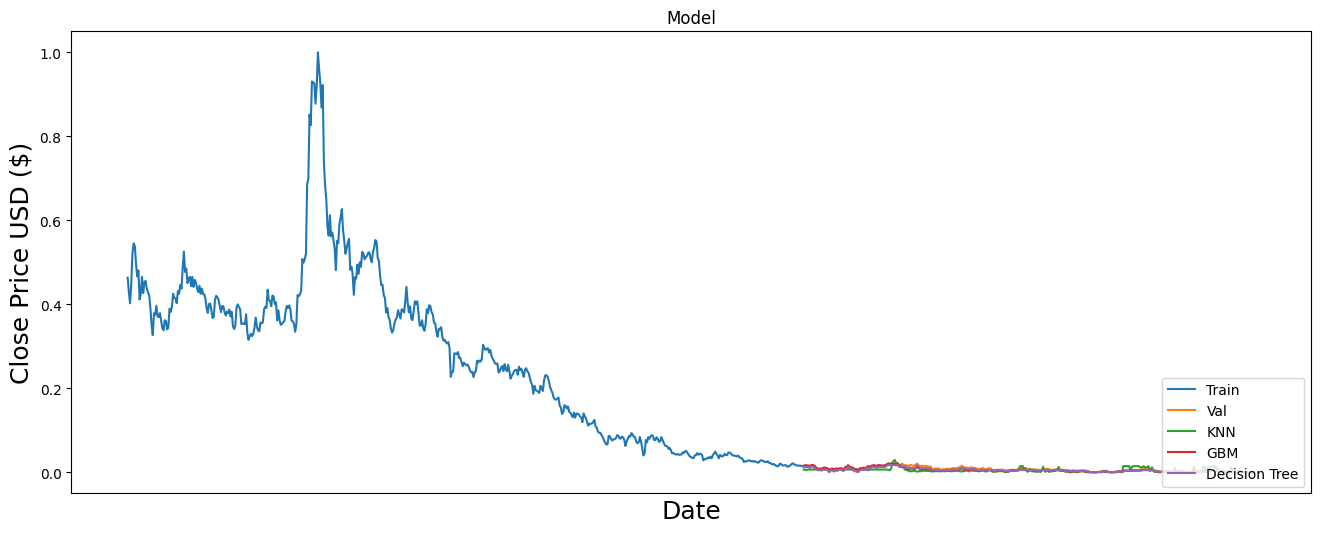

In [53]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(date.iloc[:len] ,train[:,0])
plt.plot(date.iloc[len:], test[:,0])
plt.plot(date.iloc[len:], y_pred_knn)
plt.plot(date.iloc[len:], y_pred_gbm)
plt.plot(date.iloc[len:], y_pred_tree)
plt.xticks([])
plt.legend(['Train', 'Val', 'KNN', 'GBM', 'Decision Tree'], loc='lower right')
plt.show()